In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [3]:
data = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')

In [4]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Unnamed is copy the index so remove here
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Investigate Data

In [6]:
# Displays the names of columns, the data types they contain, 
# and whether they have any missing values.
# All values look to be of the correct type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
# Get the number of unique values in each of the columns 
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [8]:
# Returns some summary stats such as count,
# mean, std, min, max and data types
display(data.describe())
data.describe(include=object)

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


## Correlation 
* No significant correlation in numerical data
* When categorical data converted into numerical codes values in warmer colours show stronger correlation 
    * Not very useful as it only shows that currecncy depends on country 


In [9]:
# No signficant correlation in numerical data
data.corr().style.background_gradient(cmap='coolwarm')

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


In [10]:
# Copy data and convert to category for correlation 
data_temp = data.copy(deep=True)
for col_name in data.describe(include=object).columns:
    data_temp[col_name] = data_temp[col_name].astype('category').cat.codes
data_temp.corr().style.background_gradient(cmap='coolwarm')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.202420,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.199998,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.087365,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,-0.149591,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.120725,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959
salary_currency,0.202420,0.199998,-0.087365,-0.149591,-0.120725,1.000000,0.420550,0.758730,0.149746,0.787084,0.038849
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,0.420550,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.758730,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.149746,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.787084,0.428994,0.897704,0.169083,1.000000,-0.066554


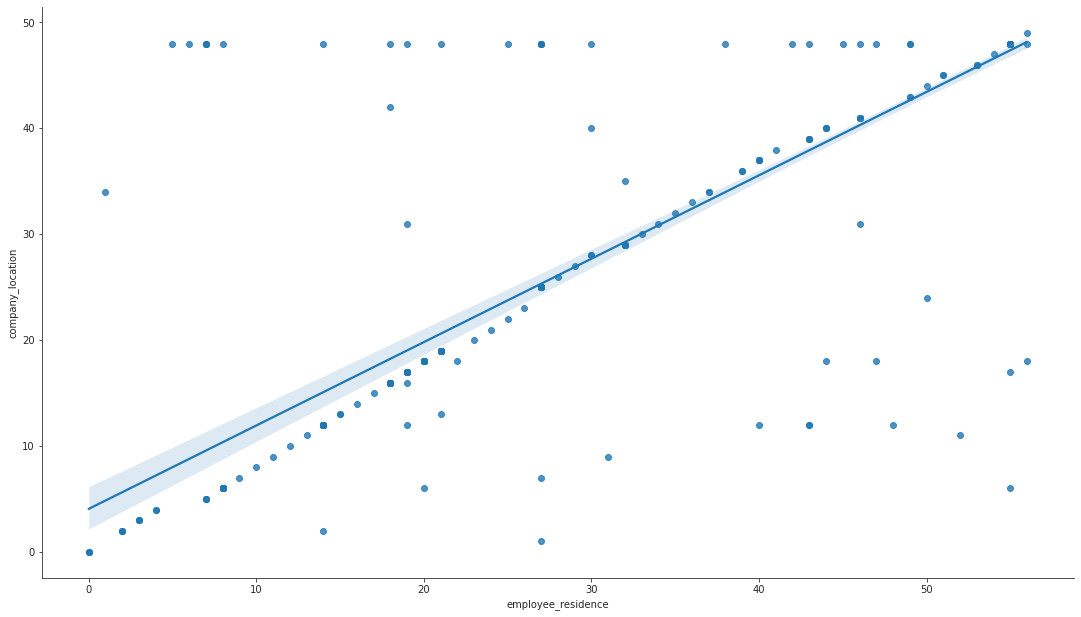

In [11]:
# Using coded values since regplot won't work with strings 
sns.set_style('ticks')
g = sns.regplot(x=data_temp['employee_residence'], y=data_temp['company_location'])
g.figure.set_size_inches(18.5, 10.5)
sns.despine()

<AxesSubplot:xlabel='Job Title', ylabel='Salary (USD)'>

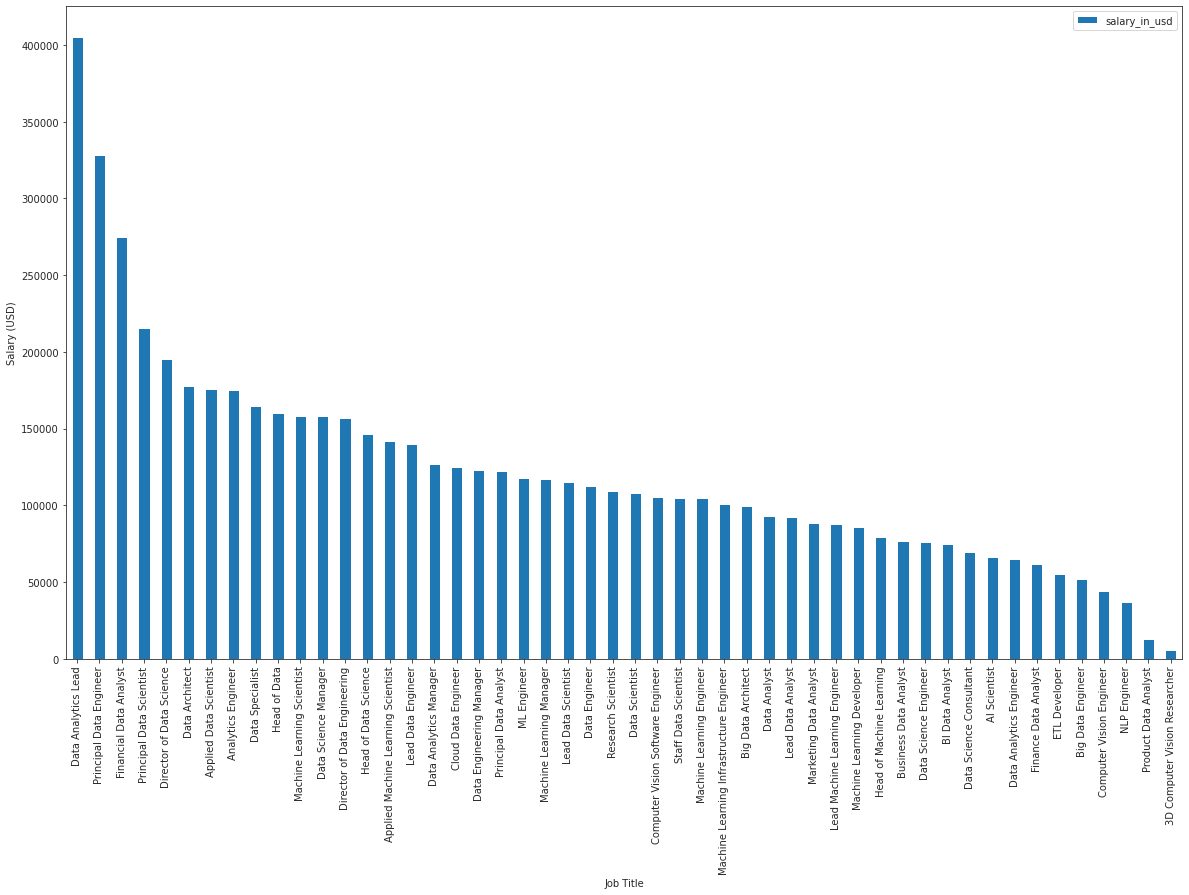

In [12]:
# Get average salary of highest paid jobs
data.groupby('job_title').mean().sort_values(by='salary_in_usd', ascending=False).plot(kind='bar', y='salary_in_usd',figsize=(20, 12),xlabel='Job Title', ylabel='Salary (USD)')

Text(0, 0.5, 'Number of Positions')

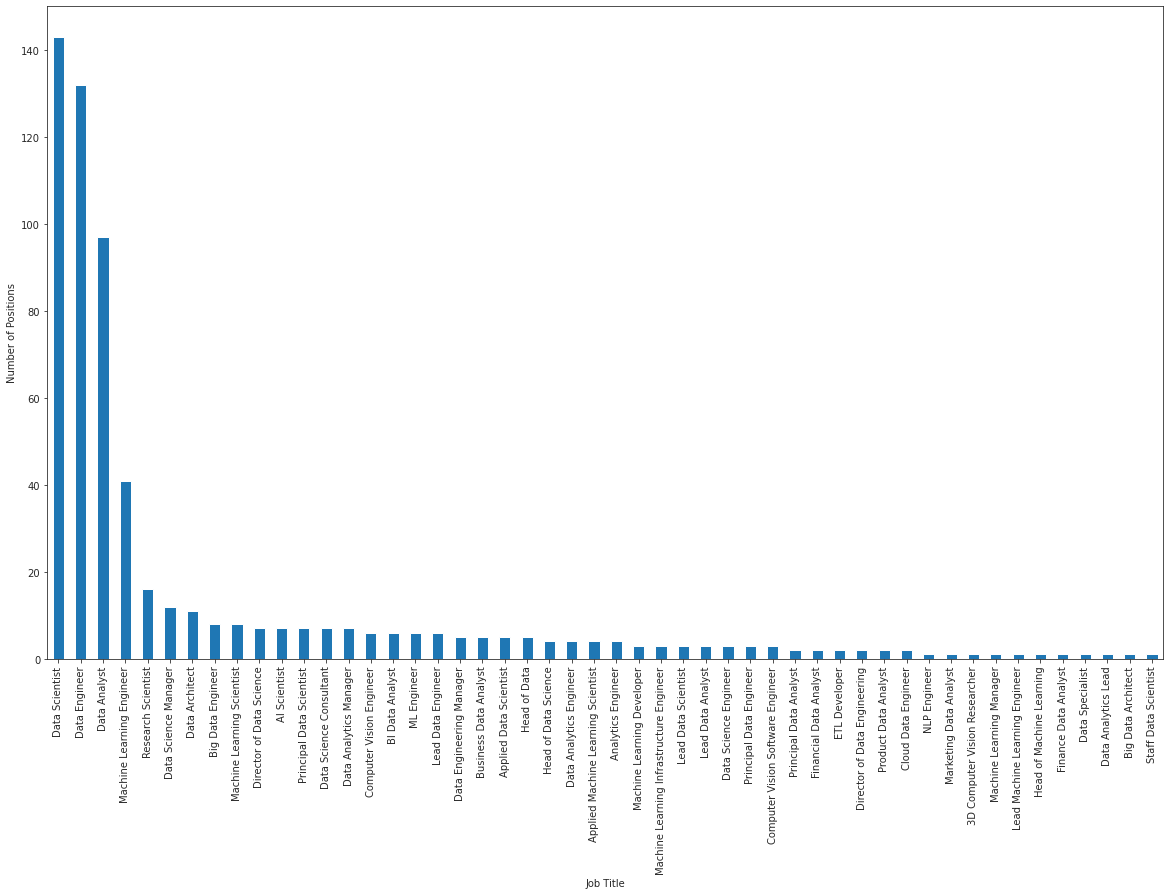

In [13]:
# Get most popular jobs 
# Can sort by any column since they all have the same aggregated count from the group by
data.groupby('job_title').count().sort_values(by='salary_in_usd', ascending=False).plot(kind='bar', y='salary_in_usd',figsize=(20, 12))
plt.legend().remove()
plt.xlabel('Job Title')
plt.ylabel('Number of Positions')

Text(0, 0.5, 'Average salary')

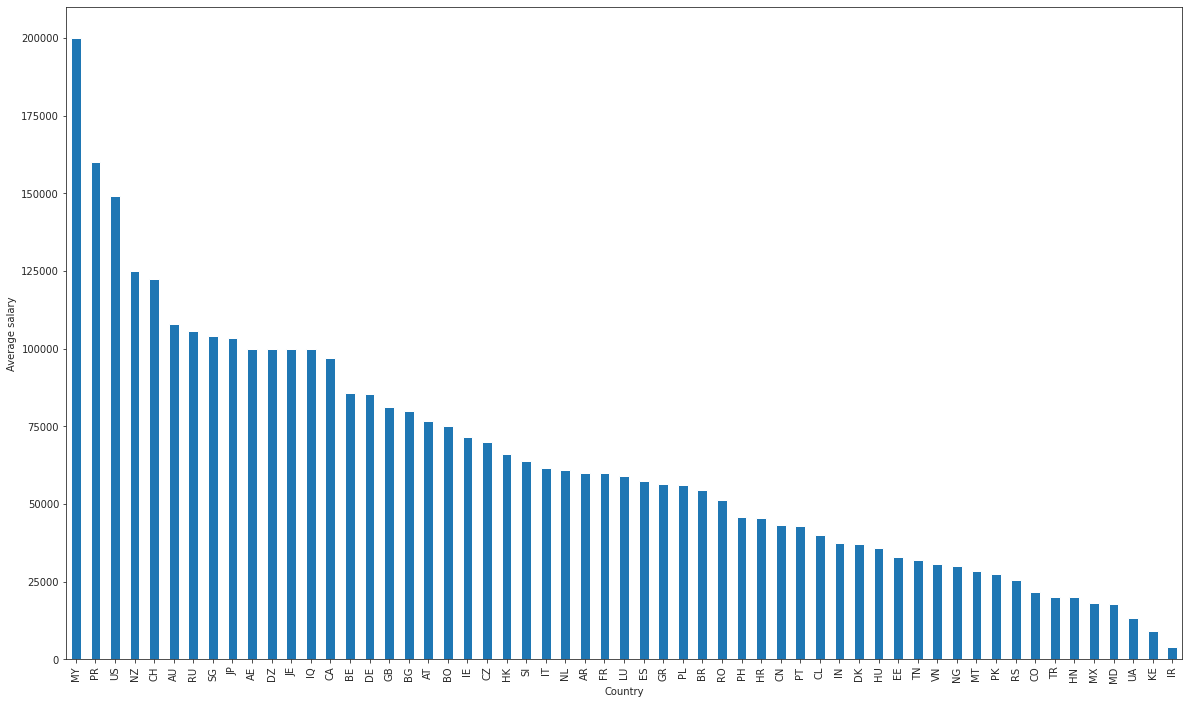

In [14]:
# Get average salary of highest paid jobs per country
# Very misleading, next graph will explain
data.groupby('employee_residence').mean().sort_values(by='salary_in_usd', ascending=False).plot(kind='bar', y='salary_in_usd',figsize=(20, 12))
plt.legend().remove()
plt.xlabel('Country')
plt.ylabel('Average salary')

Text(0, 0.5, 'Total Positions')

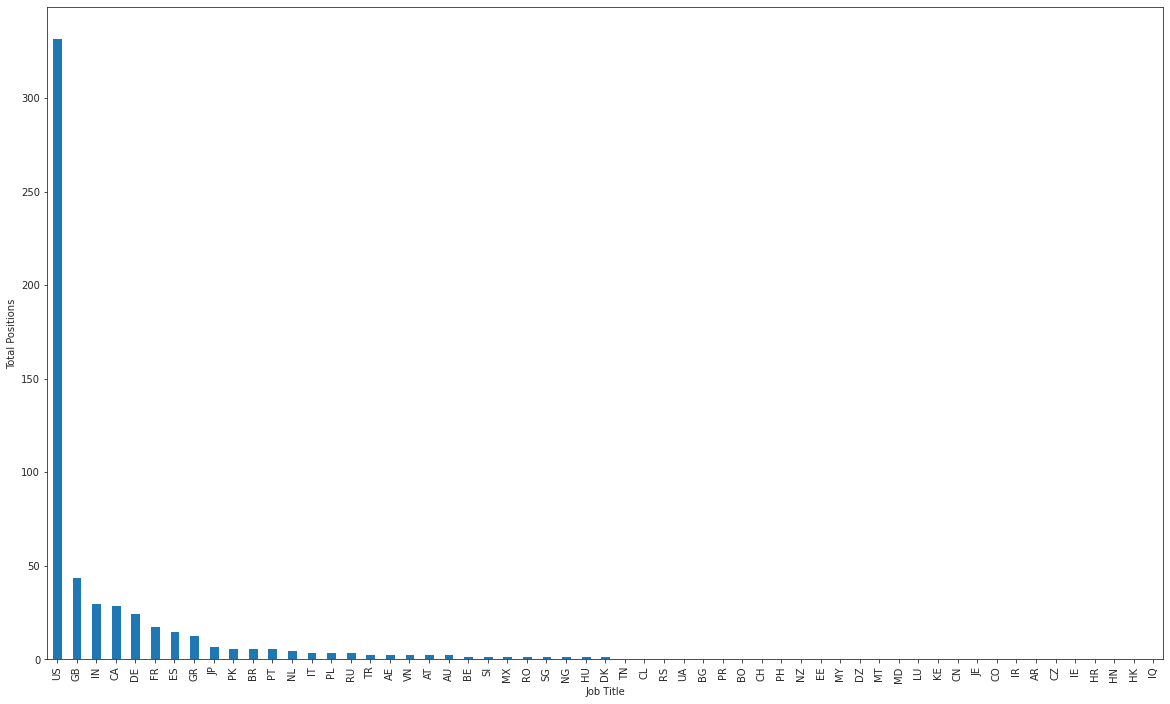

In [15]:
# Get Total number of jobs in each country 
# US jobs dominate the sample
data.groupby('employee_residence').count().sort_values(by='job_title', ascending=False).plot(kind='bar', y='salary_in_usd',figsize=(20, 12))
plt.legend().remove()
plt.xlabel('Job Title')
plt.ylabel('Total Positions')